Source: "Probability Distrubtions and Hypothesis Testing Using Python", Suchanaga Chakrabarti, 1/14/2020.   https://medium.com/analytics-vidhya/probability-distributions-and-hypothesis-tests-using-python-2ee25cb3a90f

# Probability Distributions:
    
## <font color = 'red'>**Binomial Distribution** <font color = 'black'> 
A discrete probability distribution that has several applications in business contexts. 

A random variable is said to follow a binomial distribution when: 
* It can have 2 outcomes: success and failure
* Getting x successes out of n trials
* Probability p is constant through the event.

**Problem statement:**

SREE CLOTHING is a clothing company selling clothes on a daily basis. It is observed that 10% of their customers return the items for many reasons. On a specific day, 20 customers purchased items from the shop. **Calculate:**

* The probability that exactly 5 customers will return the items.

In [15]:
from pydataset import data
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [16]:
n = 20
p = 0.10
returns = stats.binom(n, p).pmf(5)
x = np.round(returns * 100,2)
print(returns)
print()
print(f"The probability that exactly 5 customers will return the items is:  {x}%.")

0.03192136111995428

The probability that exactly 5 customers will return the items is:  3.19%.


In [23]:
# Could have done this ^^^ is one line of code also.

stats.binom.pmf(5, 20, .10)

0.03192136111995428

Text(0, 0.5, 'pmf')

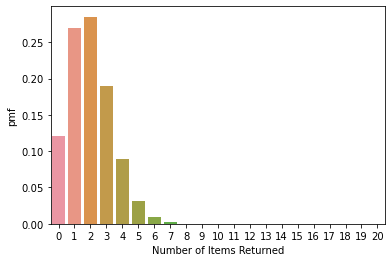

In [19]:
#We can visualize how the PMF varies with the increasing number of successful trials by creating a list and bar chart with all number of success 0-20
pmf_data = pd.DataFrame({'success':range(0,21), 'pmf':list(stats.binom.pmf(range(0,21), 20, 0.1))})


sn.barplot(x = pmf_data.success, y = pmf_data.pmf)
plt.xlabel("Number of Items Returned")
plt.ylabel("pmf")

* The probability that a maximum of 5 customers will return the items.

In [20]:
n = 20
p = 0.10
stats.binom(n, p).cdf(5)

0.988746865835491

In [25]:
returns = np.round(stats.binom(n, p).cdf(5) * 100, 2)
print(f"The probability that no more than 5 customers will return the items is {returns}%")

The probability that no more than 5 customers will return the items is 98.87%


* The probability that more than 5 customers will return the items. 

In [21]:
n = 20
p = 0.10
stats.binom(n,p).sf(5)

# We could have also used:  1 - stats.binom(n,p).cdf(5)

0.011253134164509009

In [26]:
returns = np.round(stats.binom(n, p).sf(5) * 100, 2)
print(f"The probability that more than 5 customers will return the items is {returns}%")

The probability that more than 5 customers will return the items is 1.13%


* The average number of customers who are likely to return the items and the variance and the standard deviation of the number of returns.


In [31]:
#. The average is given by np Variance is given by np*(1-p)

mean,var = stats.binom.stats(20, 0.1)
print('Average: ',mean, 'Variance: ',var)

Average:  2.0 Variance:  1.8


In [39]:
### find standard deviation  -- not certain this is correct!!!!!
pmf_data = pd.DataFrame({'success':range(0,21), 'pmf':list(stats.binom.pmf(range(0,21), 20, 0.1))})

np.std(pmf_data.pmf)

0.08911971230481867

## <font color = 'red'>Poisson Distribution:<font color = 'black'>

Used in calculating the number of events that may occur over a period of time and space. We need a rate of occurrence (lambda)

**Problem Statement:** 
The number of cash withdrawals at an ATM follows a Poisson Distribution at 10 withdrawals per hour. Calculate:
* The probability that a maximum of 5 withdrawals will happen.


In [42]:
λ = 10    #lambda is 10, based on 10 per hour
stats.poisson(λ).cdf(5)

0.06708596287903189

* The probability that a number of withdrawals over a period of 3 hours will exceed 30.

In [43]:
λ = 30    #lamda is 30, based on 10 per hour for three hours
stats.poisson(λ).sf(30)

0.45164848742208863

In [44]:
#We can visualize the change in PMF as the number of withdrawals increases: 

pmf_data_poisson = pd.DataFrame({'success':range(0,31),'pmf':list(stats.poisson.pmf(range(0,31), 10))})

Text(0, 0.5, 'pmf')

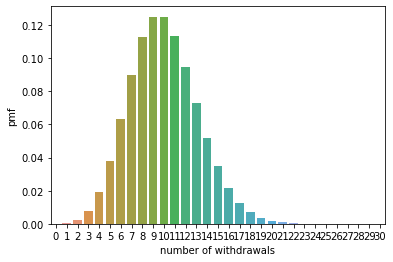

In [45]:
sn.barplot(x = pmf_data_poisson.success, y = pmf_data_poisson.pmf)
plt.xlabel('number of withdrawals')
plt.ylabel('pmf')


## <font color = 'red'>**Normal Distribution:**<font color = 'black'>
Most popular continuous distribution -- used for naturally occurring measures (age, salary, sales volume, birth weight, height, etc.)

When mean(μ) = 0 and std = 1, this is **standard normal distribution**. 



**Problem Statement:**
The heights of adult females are normally distributed with mean = 160cm and sd= 8cm.
* The probability that any randomly selected female has a height greater than 170cm.
* The probability that any randomly selected female has a height greater than 180cm provided she is tall, tall means height greater than 170cm.

In [46]:
mean = 160
sd = 8
mean, sd
stats.norm(mean,sd).sf(170)

0.10564977366685535

In [47]:
# This is conditional probability (normal distribution).  It involves finding the probability of the intersection of both the person taller than 170 and taller than 180
# We will divide sf(180) by sf (170).

stats.norm(160,8).sf(180)/stats.norm(160,8).sf(170)

0.05877594537359847